In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading and Transforming the data 

In [2]:
# The data was collected from the github repository of the John Hopkins University , put together in an Excel spreadsheet 
#to transform it a bit since there were things easier to identify in excel.
raw_confirmed = pd.read_excel('Covid19.xlsx','Confirmed')
raw_deaths = pd.read_excel('Covid19.xlsx','Deaths')
raw_recovered = pd.read_excel('Covid19.xlsx','Recovered')

In [3]:
confirmed = raw_confirmed.copy()
confirmed.Date = pd.to_datetime(confirmed.Date, dayfirst = True)
confirmed.set_index("Date", inplace=True)
confirmed=confirmed.asfreq('d')
confirmed

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia_Australian Capital Territory,Australia_New South Wales,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Total_Confirmed
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,2,0,0,0,0,0,2118
2020-01-27,0,0,0,0,0,0,0,0,0,4,...,0,0,0,2,0,0,0,0,0,2927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12,42795,26211,65108,5616,13053,131,1284519,112680,114,4469,...,69560,1,96140,1253,60784,10,2071,17056,8696,52773431
2020-11-13,42969,26701,65975,5725,13228,133,1296378,114383,114,4469,...,69754,1,96441,1256,61514,10,2072,17093,8765,53421872
2020-11-14,43035,27233,66819,5725,13374,134,1304846,115855,114,4486,...,69987,1,96933,1265,62167,10,2072,17097,8786,54015689


In [4]:
deaths = raw_deaths.copy()
deaths.Date = pd.to_datetime(deaths.Date, dayfirst = True)
deaths.set_index("Date", inplace=True)
deaths=deaths.asfreq('d')

In [5]:
recovered = raw_recovered.copy()
recovered.Date = pd.to_datetime(recovered.Date, dayfirst = True)
recovered.set_index("Date", inplace=True)
recovered=recovered.asfreq('d')

### Analyzing the Totals

In [6]:
total = pd.DataFrame([confirmed['Total_Confirmed'], deaths['Total_Deaths'],recovered['Total_Recovered']])
total = total.T
total['Total_Active'] = total['Total_Confirmed']-total['Total_Deaths']-total['Total_Recovered']
total

,Total_Confirmed,Total_Deaths,Total_Recovered,Total_Active
Date,,,,
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
2020-01-27,2927,82,61,2784
...,...,...,...,...
2020-11-12,52773431,1294372,34150475,17328584
2020-11-13,53421872,1303906,34453243,17664723
2020-11-14,54015689,1312896,34731314,17971479


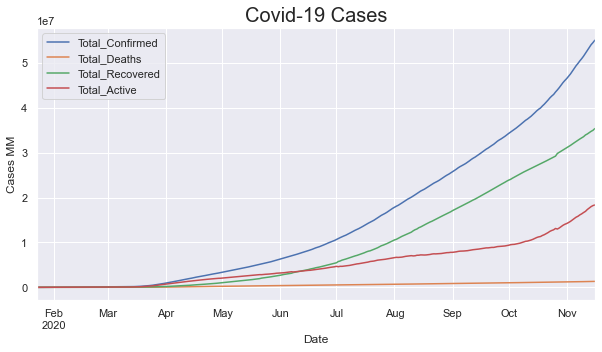

In [7]:
total.plot(figsize=(10,5))
plt.title('Total', size=20)
plt.ylabel('Cases MM')
plt.title('Covid-19 Cases', size=20)
plt.show()

#### As we can see, confirmed cases have had a steady increase, however, deaths from the virus have had a slower increase, becoming almost flat, actually, the mortality rate is 2,41%. On the other hand, recovered cases have had a steady increase, but the gap between recovered and confirmed has become larger. For active cases, I have used the difference between confirmed cases minus recovered and deaths. This confirms that what worries about this virus is not the death rate, but the speed at which it spreads.

In [8]:
print('Mortality Rate', str(total['Total_Deaths'].iloc[-1]/total['Total_Confirmed'].iloc[-1]*100))

Mortality Rate 2.412081750458326


### Percentage Change

In [9]:
pc_change = pd.DataFrame([confirmed.Total_Confirmed.pct_change(1).mul(100), deaths.Total_Deaths.pct_change(1).mul(100),
                      recovered.Total_Recovered.pct_change(1).mul(100), total.Total_Active.pct_change(1).mul(100)])
pc_change = pc_change.T
pc_change.rename(columns={'Total_Confirmed':'pc_Confirmed', 'Total_Deaths': 'pc_Deaths', 'Total_Recovered': 'pc_Recovered',
                         'Total_Active':'pc_Active'}, inplace= True)
pc_change

,pc_Confirmed,pc_Deaths,pc_Recovered,pc_Active
Date,,,,
2020-01-23,NaN,NaN,NaN,NaN
2020-01-24,43.883792,44.444444,20.000000,45.049505
2020-01-25,52.391073,61.538462,8.333333,53.924915
2020-01-26,47.698745,33.333333,33.333333,48.558758
2020-01-27,38.196412,46.428571,17.307692,38.507463
...,...,...,...,...
2020-11-12,1.240891,0.758508,0.660619,2.441330
2020-11-13,1.228726,0.736573,0.886570,1.939795
2020-11-14,1.111562,0.689467,0.807097,1.736546


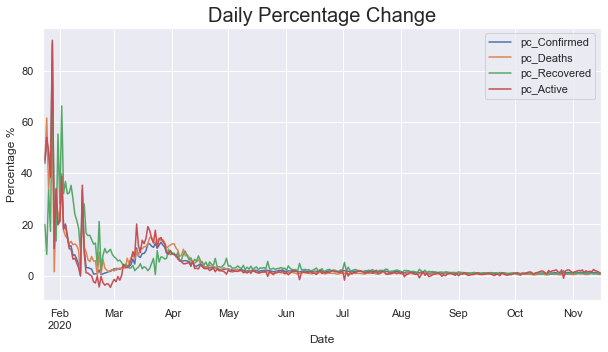

In [10]:
pc_change.plot(figsize=(10,5))
plt.title('Daily Percentage Change', size=20)
plt.ylabel('Percentage %')
plt.show()

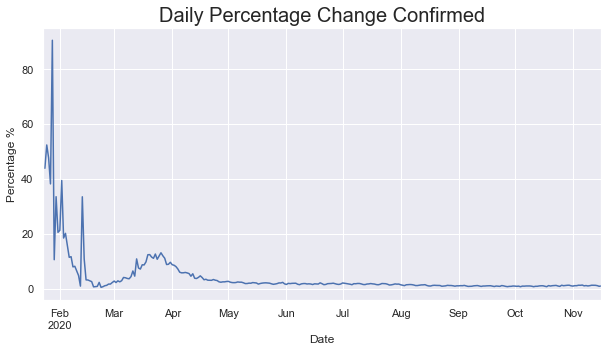

In [11]:
pc_change['pc_Confirmed'].plot(figsize=(10,5))
plt.title('Daily Percentage Change Confirmed', size=20)
plt.ylabel('Percentage %')
plt.show()

#### By plotting the daily percentage of confirmed cases, we can see that the highest peak was at the beginning when no one knew much about the virus and no preventive measures had been taken. After that, the curve descends rapidly and manages to stabilize from May onwards. The first tells us that the virus has spread at a slower rate, yet it is still positive, which means that cases continue to grow.

### Daily Change

In [12]:
change = pd.DataFrame([confirmed.Total_Confirmed.diff(), deaths.Total_Deaths.diff(),
                      recovered.Total_Recovered.diff()])
change = change.T
change.rename(columns={'Total_Confirmed':'var_Confirmed', 'Total_Deaths': 'var_Deaths', 'Total_Recovered': 'var_Recovered'},
             inplace= True)
change['var_Active'] = change['var_Confirmed']-change['var_Deaths']-change['var_Recovered']
change

,var_Confirmed,var_Deaths,var_Recovered,var_Active
Date,,,,
2020-01-23,NaN,NaN,NaN,NaN
2020-01-24,287.0,8.0,6.0,273.0
2020-01-25,493.0,16.0,3.0,474.0
2020-01-26,684.0,14.0,13.0,657.0
2020-01-27,809.0,26.0,9.0,774.0
...,...,...,...,...
2020-11-12,646834.0,9744.0,224124.0,412966.0
2020-11-13,648441.0,9534.0,302768.0,336139.0
2020-11-14,593817.0,8990.0,278071.0,306756.0


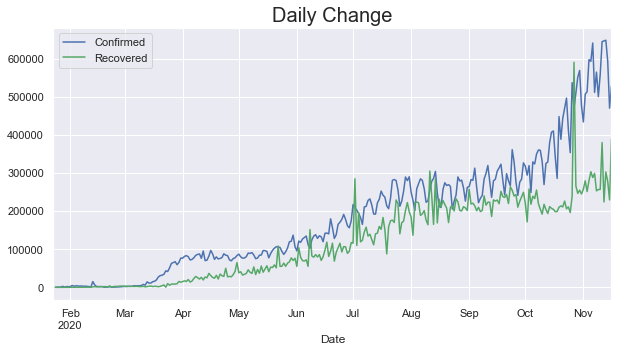

In [13]:
change['var_Confirmed'].plot(figsize=(10,5), label='Confirmed')
change['var_Recovered'].plot(color='g', label='Recovered')
plt.legend()
plt.title('Daily Change', size=20)
plt.show()

#### Reviewing the new cases per day, we can see that, although the trend is upward, the recovered cases have also increased making the opposite effect, even in some points there are fewer cases than the previous day.

### Analysis by Country

In [14]:
accumulated = pd.DataFrame()
accumulated['Confirmed'] = confirmed.iloc[-1,1:-1]
accumulated

,Confirmed
Albania,28432
Algeria,68589
Andorra,5914
Angola,13615
Antigua and Barbuda,134
...,...
West Bank and Gaza,63867
Western Sahara,10
Yemen,2078
Zambia,17187


### Mortality Rate

In [33]:
accumulated['Deaths']=deaths.iloc[-1,1:-1]
accumulated['Mortality_Rate_%'] = round(accumulated['Deaths']/accumulated['Confirmed']*100,2)
accumulated

,Confirmed,Deaths,Mortality_Rate,Mortality_Rate_%
Albania,28432,631,2.22,2.22
Algeria,68589,2168,3.16,3.16
Andorra,5914,76,1.29,1.29
Angola,13615,324,2.38,2.38
Antigua and Barbuda,134,4,2.99,2.99
...,...,...,...,...
West Bank and Gaza,63867,572,0.90,0.90
Western Sahara,10,1,10.00,10.00
Yemen,2078,605,29.11,29.11
Zambia,17187,353,2.05,2.05


In [34]:
accumulated.corr(method ='pearson') 

,Confirmed,Deaths,Mortality_Rate,Mortality_Rate_%
Confirmed,1.000000,0.944948,0.036138,0.036138
Deaths,0.944948,1.000000,0.106596,0.106596
Mortality_Rate,0.036138,0.106596,1.000000,1.000000
Mortality_Rate_%,0.036138,0.106596,1.000000,1.000000


###  Top 10 Confirmed

In [35]:
top10_c=accumulated.sort_values(['Confirmed'],ascending=False, axis=0).iloc[:10]
top10_c

,Confirmed,Deaths,Mortality_Rate,Mortality_Rate_%
US,11195388,246965,2.21,2.21
India,8873541,130503,1.47,1.47
Brazil,5876464,166014,2.83,2.83
France,1992552,44731,2.24,2.24
Russia,1932711,33184,1.72,1.72
Spain,1496864,41253,2.76,2.76
United Kingdom,1390681,52147,3.75,3.75
Argentina,1318384,35727,2.71,2.71
Italy,1205881,45733,3.79,3.79
Colombia,1205217,34223,2.84,2.84


### Top 10 Mortality Rate

In [36]:
top10_mr=accumulated.sort_values(['Mortality_Rate'],ascending=False, axis=0).iloc[1:11]
top10_mr

,Confirmed,Deaths,Mortality_Rate,Mortality_Rate_%
Yemen,2078,605,29.11,29.11
MS Zaandam,9,2,22.22,22.22
Western Sahara,10,1,10.00,10.00
Mexico,1009396,98861,9.79,9.79
United Kingdom_Montserrat,13,1,7.69,7.69
Sudan,14728,1119,7.60,7.60
Ecuador,180676,13016,7.20,7.20
United Kingdom_Isle of Man,363,25,6.89,6.89
China_Hubei,68148,4512,6.62,6.62
Chad,1603,101,6.30,6.30


#### Additionally, I think it is important to show the countries with the highest mortality rate, given the average mortality rate is 2,41%, these rates show in the table above seem to be very high, however, if we take a look, we can see that for most of the countries, this rate is associate with a few amount of confirmed cases, so this high rate could be attributed to the particular health condition of the infected people and not to the sanitization measures taken by the countries. However, this is not the case for Mexico and Ecuador, since these countries have considerably high confirmed cases and still have a high mortality rate, however, due to the lack of information, I cannot go any further to see why those countries have such a high mortality rate, if I had demographic information on the infected people I could determine if this corresponds to the characteristics of the country's population, another data that could be useful is the hospital capacity throughout the evolution of the pandemic.

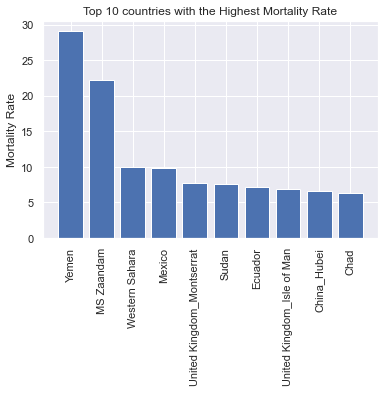

In [31]:
fig, ax = plt.subplots()
ax.bar(top10_mr.index, top10_mr['Mortality_Rate'])
ax.set_xticklabels(top10_mr.index, rotation=90)
ax.set_ylabel("Mortality Rate")
plt.title('Top 10 countries with the Highest Mortality Rate')
plt.show()

### Adding Population

In [21]:
top10_c['population(mm)']= [328.3, 1353, 209.5, 66.99, 144.5, 46.94, 66.55, 44.49, 60.36, 49.65]
top10_c['Confirmed/population']= round(top10_c['Confirmed']/(top10_c['population(mm)']*1000000)*100,2)
top10_c

,Confirmed,Deaths,Mortality_Rate,population(mm),Confirmed/population
US,11195388,246965,2.21,328.30,3.41
India,8873541,130503,1.47,1353.00,0.66
Brazil,5876464,166014,2.83,209.50,2.80
France,1992552,44731,2.24,66.99,2.97
Russia,1932711,33184,1.72,144.50,1.34
Spain,1496864,41253,2.76,46.94,3.19
United Kingdom,1390681,52147,3.75,66.55,2.09
Argentina,1318384,35727,2.71,44.49,2.96
Italy,1205881,45733,3.79,60.36,2.00
Colombia,1205217,34223,2.84,49.65,2.43


In [22]:
top10_c2=top10_c.sort_values(['Confirmed/population'],ascending=False, axis=0).iloc[:10]
top10_c2

,Confirmed,Deaths,Mortality_Rate,population(mm),Confirmed/population
US,11195388,246965,2.21,328.30,3.41
Spain,1496864,41253,2.76,46.94,3.19
France,1992552,44731,2.24,66.99,2.97
Argentina,1318384,35727,2.71,44.49,2.96
Brazil,5876464,166014,2.83,209.50,2.80
Colombia,1205217,34223,2.84,49.65,2.43
United Kingdom,1390681,52147,3.75,66.55,2.09
Italy,1205881,45733,3.79,60.36,2.00
Russia,1932711,33184,1.72,144.50,1.34
India,8873541,130503,1.47,1353.00,0.66


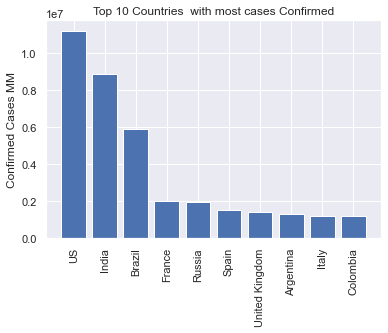

In [23]:
fig, ax = plt.subplots()
ax.bar(top10_c.index, top10_c['Confirmed'])
ax.set_xticklabels(top10_c.index, rotation=90)
ax.set_ylabel("Confirmed Cases MM")
plt.title('Top 10 Countries  with most cases Confirmed')
plt.show()

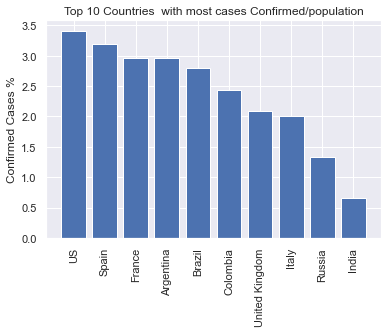

In [24]:
fig, ax = plt.subplots()
ax.bar(top10_c2.index, top10_c2['Confirmed/population'])
ax.set_xticklabels(top10_c2.index, rotation=90)
ax.set_ylabel("Confirmed Cases %")
plt.title('Top 10 Countries  with most cases Confirmed/population')
plt.show()

#### Among the countries with most cases are the United States and Brazil, which is not surprising because their governments have been characterized by not taking adequate measures to prevent the spread of the virus, on the other hand, it is striking that a country like Argentina with one of the longest quarantines is within the list of the first ten, even when the number of confirmed cases per inhabitant is measured, Argentina scales from eighth to fourth place.

### Analyzing Argentina

In [26]:
Argentina = pd.DataFrame()
Argentina['Confirmed'] = confirmed['Argentina']
Argentina['Recovered'] = recovered['Argentina']
Argentina['Deaths'] = deaths['Argentina']
Argentina['Daily_Confirmed'] = Argentina['Confirmed'].diff()
Argentina

,Confirmed,Recovered,Deaths,Daily_Confirmed
Date,,,,
2020-01-23,0,0,0,NaN
2020-01-24,0,0,0,0.0
2020-01-25,0,0,0,0.0
2020-01-26,0,0,0,0.0
2020-01-27,0,0,0,0.0
...,...,...,...,...
2020-11-12,1284519,1100180,34782,11163.0
2020-11-13,1296378,1110477,35045,11859.0
2020-11-14,1304846,1119366,35307,8468.0


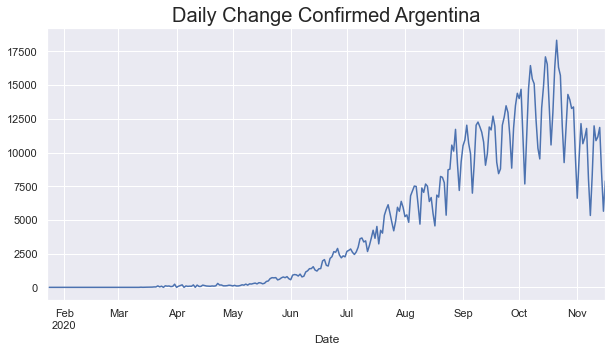

In [27]:
Argentina['Daily_Confirmed'].plot(figsize=(10,5))
plt.title('Daily Change Confirmed Argentina', size=20)
# plt.ylabel('Percentage %')
plt.show()

#### At least in Argentina the trend for new cases is decreasing, however, with the end of the quarantine it is possible that this trends reverts.